In [1]:
# -*- coding: utf-8 -*- 

In [2]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

In [3]:
!pip install bs4

In [4]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import statistics

In [5]:
!pip install lightgbm

In [6]:
import seaborn as sns

In [52]:
df = pd.read_csv('201901-202003.csv', header=0, index_col=0, squeeze=True, encoding='utf-8-sig')
sub = pd.read_csv('submission.csv',encoding='utf-8-sig')

In [8]:
df1= df.reset_index()
def year(Series):
    year_a = str(Series)
    Series = year_a[:4]
    return Series

def month(Series):
    data =str(Series)
    Series = data[4:]
    return Series

df1['year'] = df1['REG_YYMM'].apply(lambda x: year(x))
df1['month'] = df1['REG_YYMM'].apply(lambda x: month(x))
df1

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,01
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,01
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,01
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,01
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,01
5,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7,2019,01
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21,2019,01
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20,2019,01
8,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20,2019,01
9,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40,2019,01


In [9]:
df

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
REG_YYMM,,,,,,,,,,,
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20


In [10]:
df1['CARD_CCG_NM'].value_counts()

중구         1185474
남구          512319
동구          509407
서구          501952
강서구         490111
서초구         468420
강남구         459530
북구          354351
용산구         352242
제주시         325624
동작구         306745
송파구         305859
영등포구        302160
관악구         286557
구로구         273896
마포구         264269
종로구         260465
광진구         258973
성남시 분당구     247783
해운대구        219196
화성시         202257
시흥시         200850
부산진구        199860
서대문구        199439
금천구         199349
동대문구        194155
양천구         190878
성동구         188692
부천시         176822
안양시 동안구     173881
            ...   
영동군          26206
김제시          26119
곡성군          25327
화천군          25319
옹진군          25183
증평군          24772
남해군          24429
영광군          23285
완도군          23196
진안군          21961
하동군          21166
해남군          21161
예천군          21095
장흥군          21014
장수군          20926
합천군          20375
영월군          20234
고흥군          19696
청송군          18363
강진군          17857
양구군          17106
고령군         

In [11]:
y_yr = df1['AMT']


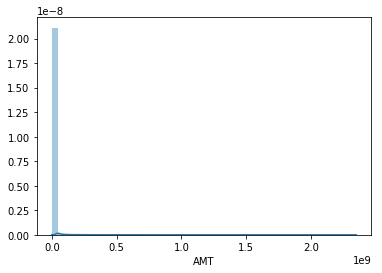

In [12]:
#타겟값이 정규분포를 띄지 않으면 회귀모델에 영향을 끼칠수 있으므로 정규화 시켜줘야함 (난 로그를 활용)
sns.distplot(y_yr)

In [13]:
log_y=np.log1p(y_yr)
yy = pd.DataFrame(log_y)

yy

,AMT
0,12.648194
1,14.133601
2,13.615474
3,14.356090
4,13.861727
5,13.349501
6,15.121362
7,15.089000
8,14.175630
9,15.788841


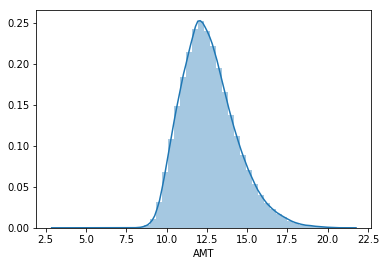

In [14]:
log_y=np.log1p(y_yr)
sns.distplot(log_y)

In [15]:
df1

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,01
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,01
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,01
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,01
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,01
5,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7,2019,01
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21,2019,01
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20,2019,01
8,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20,2019,01
9,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40,2019,01


In [16]:
x =df1
x =df1.drop(['CSTMR_CNT', 'AMT', 'CNT','REG_YYMM'],axis=1)

In [17]:
x.astype('category')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 10 columns):
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD     int64
FLC             int64
year            object
month           object
dtypes: int64(2), object(8)
memory usage: 1.8+ GB


In [18]:
k=x.isnull
k.value_counts()

AttributeError: 'function' object has no attribute 'value_counts'

In [ ]:
print(type(k))

In [19]:
cat_features = ['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM','HOM_SIDO_NM','HOM_CCG_NM','AGE','SEX_CTGO_CD','FLC','year','month']

for i in enumerate (cat_features) :
     ca = i[1]
     x[ca] = x[ca].astype('category')

In [20]:
# train_num = df.sample(frac=1, random_state=0)
# CARD_SIDO_NMs = df['CARD_SIDO_NM'].unique()
# STD_CLSS_NMs  = df['STD_CLSS_NM'].unique()
# HOM_SIDO_NMs  = df['HOM_SIDO_NM'].unique()
# AGEs          = df['AGE'].unique()
# SEX_CTGO_CDs  = df['SEX_CTGO_CD'].unique()
# FLCs          = df['FLC'].unique()
# years         = [2020]
# months        = [4, 7]

# temp = []
# for CARD_SIDO_NM in CARD_SIDO_NMs:
#     for STD_CLSS_NM in STD_CLSS_NMs:
#         for HOM_SIDO_NM in HOM_SIDO_NMs:
#             for AGE in AGEs:
#                 for SEX_CTGO_CD in SEX_CTGO_CDs:
#                     for FLC in FLCs:
#                         for year in years:
#                             for month in months:
#                                 temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
# temp = np.array(temp)
# temp = pd.DataFrame(data=temp, columns=x.columns)

이거는 데이터 프레임 카테고리를 숫자형으로 바꿔주는건데 lighbgm에서는 안써도 될수도 있어 일단 확인해보자 / 원핫코딩으로 간다

In [ ]:
pip install graphviz

In [ ]:
x.info

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:

# df_f2 = df1[["STD_CLSS_NM",'CNT','CARD_SIDO_NM','year','month']]

# cat_features= ["STD_CLSS_NM",'CARD_SIDO_NM','year','month']

# for i in enumerate (cat_features) :
#     ca = i[1]
#     df_f2[ca] = df_f2[ca].astype('category')




In [ ]:
# cat_featutres = ['CNT', 'STD_CLSS_NM_NM_Health Aid Food Retail', 'STD_CLSS_NM_Golf Club Operation',
# 'STD_CLSS_NM_Fault and Vegetable Retail', 'STD_CLSS_NM_Tourism Folk Goods and Gift Goods Retail',
# 'STD_CLSS_NM_Other classified entertainment services', 'STD_CLSS_NM_Other sports facilities operations',
# 'STD_CLSS_NM_Other comprehensive retailing', 'STD_CLSS_NM_Other large general retailing',
# 'STD_CLSS_NM_Other water entertainment services', 'STD_CLSS_NM_Other foreign restaurant businesses',
# 'STD_CLSS_NM_Other pubs', 'STD_CLSS_NM_Other food and beverage-oriented general retail trade',
# 'STD_CLSS_NM_Internal Passenger Transport', 'STD_CLSS_NM_Massageup', 'STD_CLSS_NM_ Duty Free',
#          'STD_CLSS_NM_Bus Transport','STD_CLSS_NM_NM_non-alcoholic beverage store', 'STD_CLSS_NM_Bread and confectionery retail',
# 'STD_CLSS_NM_Western Restaurant Industry', 'STD_CLSS_NM_Fishery Retail', 'STD_CLSS_NM_Supermarket',
# 'STD_CLSS_NM_Sports and Recreation Goods Rental Business', 'STD_CLSS_NM_Owner Business', 'STD_CLSS_NM_Travel Business',
# 'STD_CLSS_NM_bathrooming', 'STD_CLSS_NM_Meat retailing', 'STD_CLSS_NM_General entertainment bar business',
# 'STD_CLSS_NM_Japanese Restaurant Business', 'STD_CLSS_NM_Automobile Rental Business', 'STD_CLSS_NM_Exhibition and Event Agency',
# 'STD_CLSS_NM_regular air transport business', 'STD_CLSS_NM_Chinese restaurant business',
# 'STD_CLSS_NM_Car Gas Charging Up', 'STD_CLSS_NM_Car Gas Station Operation',
# 'STD_CLSS_NM_Change Convenience Store', 'STD_CLSS_NM_Taxi Transport Business',
# 'STD_CLSS_NM_Pizza Hamburger Sandwich and Similar Restaurants', 'STD_CLSS_NM_Korean Restaurant Business',
# 'STD_CLSS_NM_Hotel Business', 'STD_CLSS_NM_Sales of Cosmetics and Air fresheners', 'STD_CLSS_NM_Recreation Con']
# 원핫인코드 쓸때 한글이 안읽혀서 쓸려고 햇는데 노쓸모, 그래서 이것도 쓸일은 없을듯

In [21]:
train_x, test_x, train_y, test_y = train_test_split(x, yy, test_size=0.2, random_state=0)

In [22]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [23]:
params = {'learning_rate': 0.1, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'rmse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [25]:

model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.0312
[200]	valid_0's rmse: 0.879934
[300]	valid_0's rmse: 0.813894
[400]	valid_0's rmse: 0.775781
[500]	valid_0's rmse: 0.752891
[600]	valid_0's rmse: 0.737782
[700]	valid_0's rmse: 0.725713
[800]	valid_0's rmse: 0.71713
[900]	valid_0's rmse: 0.710555
[1000]	valid_0's rmse: 0.704864
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.704864


In [26]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [27]:
rmlse = round(mean_squared_error(test_y, predict_test) ** 0.5)
#test y에 log를 취했으니까 나오는 predict_test도 log 값일꺼야 그렇다면 이걸로   rmse를 구하면 rmsle가 되지 않을까
r2 = r2_score(test_y, predict_test)

In [28]:
print('Mean squared error: ', rmlse)
print('R2 score: ', r2)

Mean squared error:  1.0
R2 score:  0.830949018885168


In [29]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result

,AMT,0
0,12.308273,11.867262
1,11.478106,11.374408
2,13.059000,13.246416
3,13.032441,13.063987
4,14.387055,13.728466
5,12.380030,12.093894
6,12.177524,11.799351
7,11.280375,12.134623
8,11.060384,10.680662
9,11.002117,10.676669


In [30]:
final_result.columns = ['true','predict']

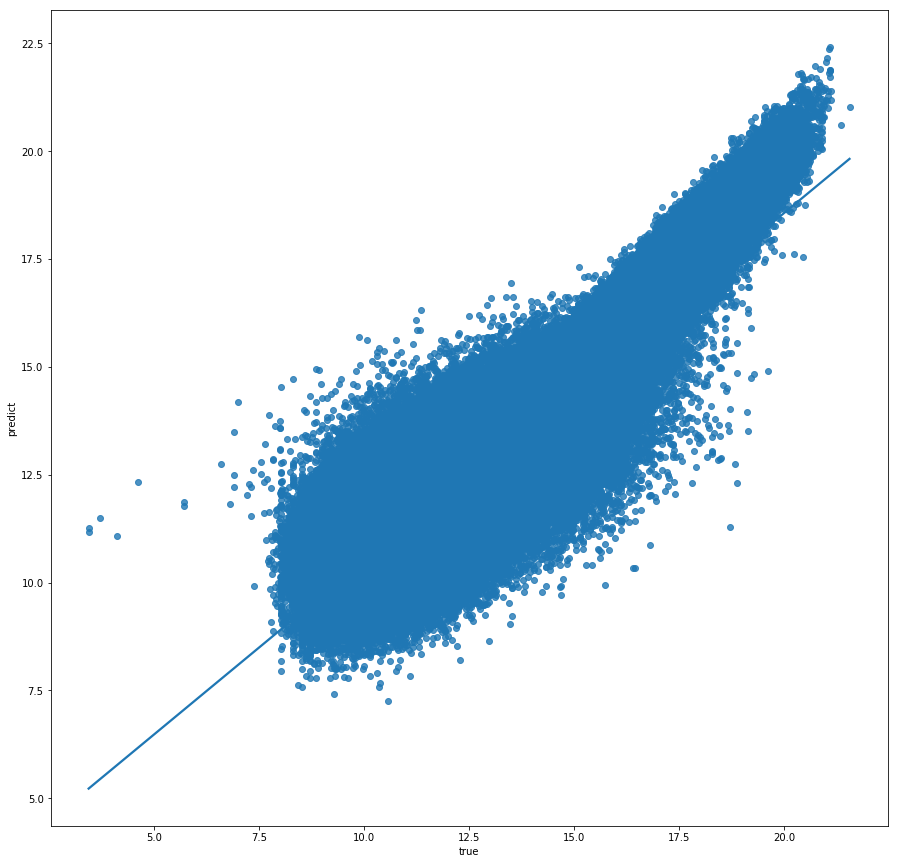

In [31]:
plt.figure(figsize=(15,15))
sns.regplot(x = 'true', y = 'predict', data = final_result)

In [ ]:
df.info()

In [ ]:
# def grap_year(data):
#     data = str(data)
#     return int(data[:4])

# def grap_month(data):
#     data = str(data)
#     return int(data[4:])
# data = pd.read_csv('201901-202003.csv')
# data = data.fillna('')
# data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
# data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
# data = data.drop(['REG_YYMM'], axis=1)


In [54]:
subm= sub.reset_index()
def year(Series):
    year_a = str(Series)
    Series = year_a[:4]
    return Series

def month(Series):
    data =str(Series)
    Series = data[4:]
    return Series

subm['year'] = sub['REG_YYMM'].apply(lambda x: year(x))
subm['month'] = sub['REG_YYMM'].apply(lambda x: month(x))


In [60]:
submi=subm.drop(['index','REG_YYMM','AMT'],axis=1)

In [80]:
sub

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0
5,5,202004,강원,그외 기타 스포츠시설 운영업,0
6,6,202004,강원,그외 기타 종합 소매업,0
7,7,202004,강원,기타 대형 종합 소매업,0
8,8,202004,강원,기타 수상오락 서비스업,0
9,9,202004,강원,기타 외국식 음식점업,0


In [69]:
submission = submi.merge(x, on=['CARD_SIDO_NM', 'STD_CLSS_NM'])

In [92]:
prac=submission.rename(columns={"year_x":"year",	"month_x":"month"})

In [88]:
submission.drop(['year_y','month_y'],inplace=True,axis=1)

In [96]:
lego=prac.drop('id',axis=1)

In [99]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 10 columns):
CARD_SIDO_NM    category
CARD_CCG_NM     category
STD_CLSS_NM     category
HOM_SIDO_NM     category
HOM_CCG_NM      category
AGE             category
SEX_CTGO_CD     category
FLC             category
year            category
month           category
dtypes: category(10)
memory usage: 282.7 MB


In [100]:
lego.astype('categoty')

TypeError: data type 'categoty' not understood

In [101]:
cat_features = ['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM','HOM_SIDO_NM','HOM_CCG_NM','AGE','SEX_CTGO_CD','FLC','year','month']

for i in enumerate (cat_features) :
     ca = i[1]
     lego[ca] = lego[ca].astype('category')

In [102]:
pred = model.predict(lego)

In [187]:
final_result = pd.concat([lego, pd.DataFrame(pred)], axis = 1)
final_result

,CARD_SIDO_NM,STD_CLSS_NM,year,month,CARD_CCG_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,AMT,0
0,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,20s,1,1,11.0,10.968203
1,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,1,2,11.0,10.968203
2,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,2,2,11.0,10.968203
3,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,3,11.0,10.968203
4,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,4,11.0,10.968203
5,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,2,3,11.0,10.968203
6,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,1,4,11.0,10.968203
7,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,2,4,11.0,10.968203
8,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,1,5,11.0,10.968203
9,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,2,5,11.0,10.968203


In [188]:
final_result["AMT"]=final_result.iloc[:,-1]
final_result

,CARD_SIDO_NM,STD_CLSS_NM,year,month,CARD_CCG_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,AMT,0
0,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,20s,1,1,10.968203,10.968203
1,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,1,2,10.968203,10.968203
2,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,2,2,10.968203,10.968203
3,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,3,10.968203,10.968203
4,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,4,10.968203,10.968203
5,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,2,3,10.968203,10.968203
6,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,1,4,10.968203,10.968203
7,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,2,4,10.968203,10.968203
8,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,1,5,10.968203,10.968203
9,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,2,5,10.968203,10.968203


In [190]:
final =final_result.iloc[:,:-1]

In [191]:
final

,CARD_SIDO_NM,STD_CLSS_NM,year,month,CARD_CCG_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,AMT
0,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,20s,1,1,10.968203
1,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,1,2,10.968203
2,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,30s,2,2,10.968203
3,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,3,10.968203
4,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,1,4,10.968203
5,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,40s,2,3,10.968203
6,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,1,4,10.968203
7,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,50s,2,4,10.968203
8,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,1,5,10.968203
9,강원,건강보조식품 소매업,2020,04,강릉시,강원,강릉시,60s,2,5,10.968203


In [200]:
submission = sub.merge(final, on=['CARD_SIDO_NM', 'STD_CLSS_NM'])

In [203]:
subf=submission.drop(['AMT_x'],axis=1)
subf=submission.rename(columns={"AMT_y":"AMT"})

In [221]:
temp = subf[['id','REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['id','REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).mean().reset_index(drop=False)

In [222]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
id              1300 non-null int64
REG_YYMM        1300 non-null int64
CARD_SIDO_NM    1300 non-null object
STD_CLSS_NM     1300 non-null object
AMT             1300 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 50.9+ KB


In [219]:
temp.to_csv('submission1.csv', encoding='utf-8-sig')

In [214]:
math.exp(temp['AMT'])

TypeError: cannot convert the series to <class 'float'>

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()

In [ ]:
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# def rmsle(y,pred):
#     log_y = np.log1p(y)
#     log_pred = np.log1p(pred)
#     squared_error =(log_y - log_pred) **2
#     rmsle = np.sqrt(np.mean(squared_error))
#     return rmsle

# rmsle(final_result.iloc[:,0],final_result.iloc[:,1])

In [ ]:
# final_result.iloc[:,1]

In [ ]:
final_result.columns = ['true','predict']

In [ ]:
plt.figure(figsize=(15,15))
sns.regplot(x = 'true', y = 'predict', data = final_result)